In [1]:
%matplotlib ipympl

from ipywidgets import *

import sys
from time import time
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colormaps
from mpl_toolkits.mplot3d import Axes3D, art3d

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 75

import xml.etree.ElementTree as ET
import h5py

from importlib import reload

sys.path.append('/Users/patrickoare/lqcd/utilities')
# import pytools as pyt
import plottools as pt
import formattools as fmt
pt.set_font()
default_style = fmt.styles['notebook']
default_style['colwidth'] = 10

import GCR
import utils

In [2]:
# put these into a dataframe later
root = r'/Users/patrickoare/lqcd/multigrid/spectra/32cube-rho0.124-tau4/'
idxs = [
    3.000000,
    3.002083,
    3.004167,
    3.006250,
    3.008333,
    3.010417,
    3.012500,
    3.014583,
    3.016667,
    3.018750,
    3.020833
]
files = [
    f'{root}/U_smr_3.000000/Nm48_Nk24_8101234.aurora-pbs-0001.hostmgmt.cm.aurora.alcf.anl.gov/evals.txt',
    f'{root}/U_smr_3.002083/Nm48_Nk24_8105677.aurora-pbs-0001.hostmgmt.cm.aurora.alcf.anl.gov/evals.txt',
    f'{root}/U_smr_3.004167/Nm48_Nk24_8105680.aurora-pbs-0001.hostmgmt.cm.aurora.alcf.anl.gov/evals.txt',
    f'{root}/U_smr_3.006250/Nm48_Nk24_8105682.aurora-pbs-0001.hostmgmt.cm.aurora.alcf.anl.gov/evals.txt',
    f'{root}/U_smr_3.008333/Nm48_Nk24_8105683.aurora-pbs-0001.hostmgmt.cm.aurora.alcf.anl.gov/evals.txt',
    f'{root}/U_smr_3.010417/Nm48_Nk24_8105685.aurora-pbs-0001.hostmgmt.cm.aurora.alcf.anl.gov/evals.txt',
    f'{root}/U_smr_3.012500/Nm48_Nk24_8105688.aurora-pbs-0001.hostmgmt.cm.aurora.alcf.anl.gov/evals.txt',
    f'{root}/U_smr_3.014583/Nm48_Nk24_8105691.aurora-pbs-0001.hostmgmt.cm.aurora.alcf.anl.gov/evals.txt',
    f'{root}/U_smr_3.016667/Nm48_Nk24_8105693.aurora-pbs-0001.hostmgmt.cm.aurora.alcf.anl.gov/evals.txt',
    f'{root}/U_smr_3.018750/Nm48_Nk24_8105694.aurora-pbs-0001.hostmgmt.cm.aurora.alcf.anl.gov/evals.txt',
    f'{root}/U_smr_3.020833/Nm48_Nk24_8105695.aurora-pbs-0001.hostmgmt.cm.aurora.alcf.anl.gov/evals.txt',
]

In [3]:
ritz_cuts = [
    lambda r : r < 1e-8,
    lambda r : (1e-8 <= r) & (r < 1e-5),
    lambda r : (1e-5 <= r) & (r < 1e-2),
    lambda r : 1e-2 <= r
]
ritz_cut_labels = [
    r'$r\in (-\infty, 10^{-8})$',
    r'$r\in [10^{-8}, 10^{-5})$',
    r'$r\in [10^{-5}, 10^{-2})$',
    r'$r\in [10^{-2}, \infty)$',
]

In [4]:
evals = {}
ritz = {}
for ii, f in enumerate(files):
    data = utils.read_eval_txt(f)
    evals[idxs[ii]] = data[0]
    ritz[idxs[ii]]  = data[1]

Eval 0 = (-0.850586-0.0342642j), ritz estimate = 5.56051e-08
Eval 1 = (-0.850586+0.0342642j), ritz estimate = 3.46697e-09
Eval 2 = (-0.850177-0.0531066j), ritz estimate = 1.23978e-12
Eval 3 = (-0.850177+0.0531066j), ritz estimate = 5.00723e-15
Eval 4 = (-0.848965+0.102624j), ritz estimate = 2.56196e-09
Eval 5 = (-0.848965-0.102624j), ritz estimate = 0.00145246
Eval 6 = (-0.846933+0.10945j), ritz estimate = 2.31714e-15
Eval 7 = (-0.846933-0.10945j), ritz estimate = 6.85855e-16
Eval 8 = (-0.844032+0.147724j), ritz estimate = 4.48864e-15
Eval 9 = (-0.844032-0.147724j), ritz estimate = 3.34637e-15
Eval 10 = (-0.841174+0.172815j), ritz estimate = 5.37983e-15
Eval 11 = (-0.841174-0.172815j), ritz estimate = 1.06036e-10
Eval 12 = (-0.833809-0.227024j), ritz estimate = 1.21436e-08
Eval 13 = (-0.830136+0.252317j), ritz estimate = 7.53254e-15
Eval 14 = (-0.830136-0.252317j), ritz estimate = 5.09736e-14
Eval 15 = (-0.827488-0.266106j), ritz estimate = 0.0137062
Eval 16 = (-0.827432+0.265914j), ri

In [5]:
idx = 0                 # Look at 3.000000 smear for now
tau = idxs[idx]

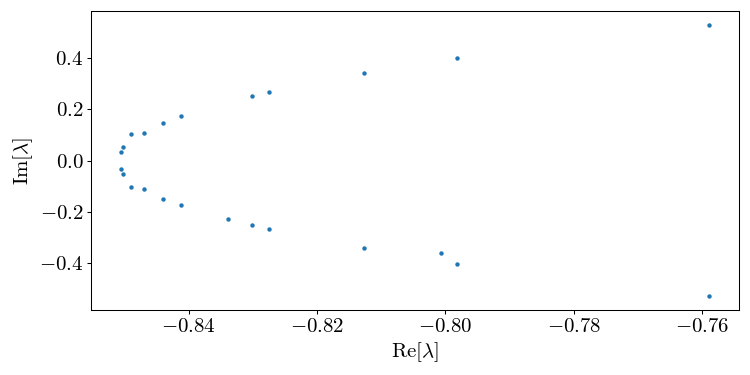

In [6]:
fig, axes = pt.add_subplots()
ax = axes[0]
pt.scatter_1d(np.real(evals[tau]), np.imag(evals[tau]), ax = ax, col = pt.pal[0], ax_label = [r'$\mathrm{Re}[\lambda]$', r'$\mathrm{Im}[\lambda]$'])
# pt.scatter_1d(np.real(grid_high), np.imag(grid_high), ax = ax, col = pt.pal[6], ax_label = [r'$\mathrm{Re}[\lambda]$', r'$\mathrm{Im}[\lambda]$'], fn_label = 'Grid', mkr = 'x')
# ax.legend(title = r'Unprec', title_fontsize = default_style['fontsize'], fontsize = default_style['fontsize'], bbox_to_anchor=(1, 1))
plt.tight_layout()
# ax.set_ylim((1.2, 1.45))

# pt.save_figure(r'/Users/patrickoare/Dropbox (Personal)/research/multigrid/plots/unprec_m0p001.pdf')

In [7]:
evals0 = evals[tau]
ritz0 = ritz[tau]

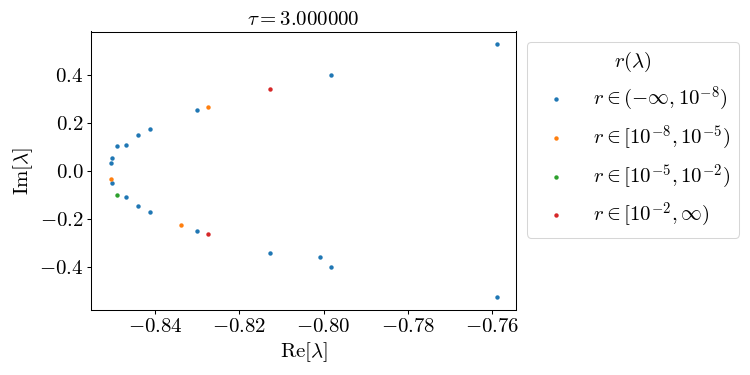

In [8]:
fig, axes = pt.add_subplots()
ax = axes[0]
for ii, cut in enumerate(ritz_cuts):
    evals0_plt = evals0[cut(ritz0)]
    pt.scatter_1d(np.real(evals0_plt), np.imag(evals0_plt), ax = ax, col = pt.pal[ii], ax_label = [r'$\mathrm{Re}[\lambda]$', r'$\mathrm{Im}[\lambda]$'], fn_label = ritz_cut_labels[ii])
ax.legend(title = r'$r(\lambda)$', title_fontsize = default_style['fontsize'], fontsize = default_style['fontsize'], bbox_to_anchor=(1, 1))
ax.set_title(r'$\tau = 3.000000$', fontsize = default_style['fontsize'])
plt.tight_layout()
# pt.save_figure(r'/Users/patrickoare/Dropbox (Personal)/research/multigrid/plots/unprec_m0p001.pdf')

### Plot all of the streams

interactive(children=(IntSlider(value=0, description='i', max=9), Output()), _dom_classes=('widget-interact',)…

<function __main__.update0(i=0)>

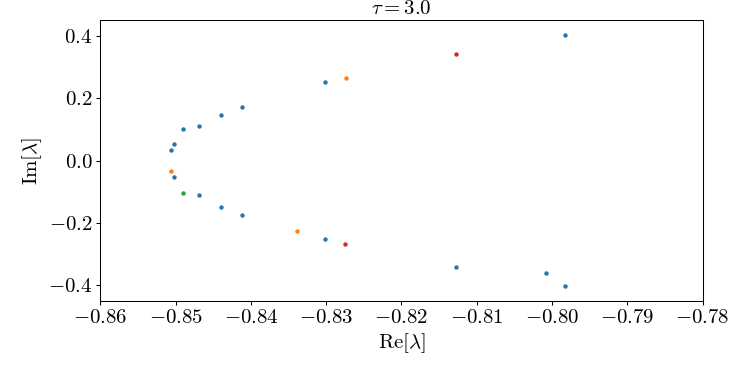

In [ ]:
fig, axes = pt.add_subplots()
ax = axes[0]
for ii, cut in enumerate(ritz_cuts):
    evals0_plt = evals0[cut(ritz0)]
    pt.scatter_1d(np.real(evals0_plt), np.imag(evals0_plt), ax = ax, col = pt.pal[ii],\
                  ax_label = [r'$\mathrm{Re}[\lambda]$', r'$\mathrm{Im}[\lambda]$'],\
                  xlims = (-0.86, -0.78), ylims = (-0.45, 0.45), fn_label = ritz_cut_labels[ii])
# ax.legend(title = r'$r(\lambda)$', title_fontsize = default_style['fontsize'], fontsize = default_style['fontsize'], bbox_to_anchor=(1, 1))
# ax.set_title(r'$\tau = 3.000000$', fontsize = default_style['fontsize'])
# plt.tight_layout()

def update0(tau_idx=0):
    ax.clear()
    tau = idxs[tau_idx]
    evals_tau = evals[tau]
    ritz_tau = ritz[tau]
    for ii, cut in enumerate(ritz_cuts):
        evals_plt = evals_tau[cut(ritz_tau)]
        pt.scatter_1d(np.real(evals_plt), np.imag(evals_plt), ax = ax, col = pt.pal[ii], xlims = (-0.86, -0.78), ylims = (-0.45, 0.45), ax_label = [r'$\mathrm{Re}[\lambda]$', r'$\mathrm{Im}[\lambda]$'], fn_label = ritz_cut_labels[ii])
    ax.set_title(r'$\tau = ' + str(tau) + r'$', fontsize = default_style['fontsize'])
    fig.canvas.draw_idle()

ax.set_xlabel(r'$\mathrm{Re}[\lambda]$', fontsize = default_style['fontsize'])
ax.set_ylabel(r'$\mathrm{Im}[\lambda]$', fontsize = default_style['fontsize'])
plt.legend(fontsize = fmt.default_style['fontsize'], bbox_to_anchor = (1, 1))

interact(update0, tau_idx = (0, 9, 1),  idxs)

In [13]:
def parse_output(estr):
    tokens = [x.strip() for x in estr.split('\n')]
    evals = []
    for token in tokens:
        if token == '': continue
        assert token[0] == '(' and token[-1] == ')', 'Wrong token input'
        token = token[1:-1].split(',')              # token == ['re', 'im']
        evals.append(
            float(token[0]) + 1j*float(token[1])
        )
    return evals
evals2 = parse_output("""(5.64453721,0.00302213275)
(-0.843936226,-0.00307971835)
 (-0.846544059,0.00664166296)
   (5.64902429,-0.0240215371)
  (-0.849024292,0.0240215372)
    (5.64902429,0.0240215372)
 (-0.849024292,-0.0240215372)
    (5.64848827,0.0242298584)
  (-0.848488345,0.0242301372)
 (-0.848488041,-0.0242305169)
   (5.64847981,-0.0242323267)
   (5.65014356,-0.0252482214)
  (-0.850143561,0.0252482214)
 (-0.850143561,-0.0252482214)
    (5.65014356,0.0252482214)
    (5.65058631,0.0342641982)
   (5.65058631,-0.0342641982)
  (-0.850586313,0.0342641982)
 (-0.850586313,-0.0342641982)
    (5.64884374,0.0419478324)
  (-0.848844741,0.0419482705)
 (-0.848855346,-0.0419659456)
   (-0.85011975,-0.044211103)
     (5.65011975,0.044211103)
    (-0.85011975,0.044211103)
    (5.65011975,-0.044211103)
 (-0.849199825,-0.0479710904)
    (5.64919403,0.0479749501)
    (-0.849194869,0.04797541)
    (5.65005743,-0.053023866)
  (-0.849458855,-0.053261021)
 (-0.785524856,-0.0951892218)""")

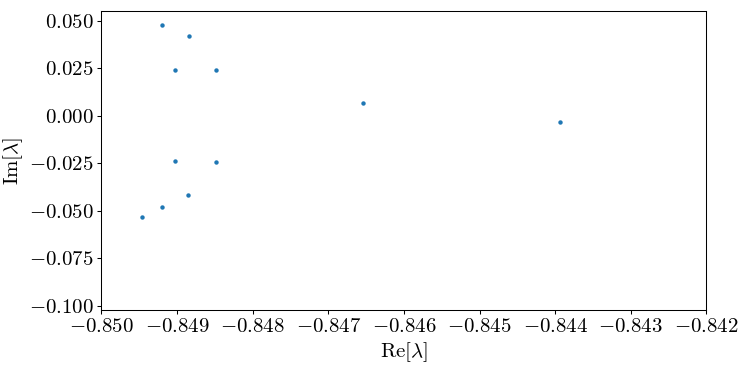

In [ ]:
fig, axes = pt.add_subplots()
ax = axes[0]
pt.scatter_1d(np.real(evals2), np.imag(evals2), ax = ax, col = pt.pal[0], ax_label = [r'$\mathrm{Re}[\lambda]$', r'$\mathrm{Im}[\lambda]$'])
# ax.set_xlim((-0.85, -0.842))
ax.set_xlim((-0.85, -0.842))
plt.tight_layout()

In [12]:
idxs

[3.0,
 3.002083,
 3.004167,
 3.00625,
 3.008333,
 3.010417,
 3.0125,
 3.014583,
 3.016667,
 3.01875,
 3.020833]